# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output

In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE
import torch

device = torch.device("cuda:1")

In [3]:
dataset = DataLoader(data_dir="DDICorpus", device=device)

In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-MedLine.d69.s0,0,0,12,VAL
1,DDI-MedLine.d69.s0,1,13,23,VAL
2,DDI-MedLine.d69.s0,2,24,26,VAL
3,DDI-MedLine.d69.s0,3,27,35,VAL
4,DDI-MedLine.d69.s0,4,36,51,VAL


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-MedLine.d69.s0,4,70,84
1,DDI-MedLine.d69.s0,4,141,150
2,DDI-MedLine.d69.s0,4,156,165
3,DDI-MedLine.d69.s1,4,28,42
4,DDI-MedLine.d69.s1,4,96,105


In [6]:
dataset.vocab[:15]

[['differential', 0],
 ['regulation', 1],
 ['of', 2],
 ['tyrosine', 3],
 ['phosphorylation', 4],
 ['in', 5],
 ['tumor', 6],
 ['cells', 7],
 ['by', 8],
 ['contortrostatin', 9],
 ['a', 10],
 ['homodimeric', 11],
 ['disintegrin', 12],
 ['and', 13],
 ['monomeric', 14]]

In [7]:
dataset.id2ner

{0: 'O', 1: 'drug', 2: 'group', 3: 'brand', 4: 'drug_n'}

In [9]:
dataset.max_sample_length

87

In [17]:
dataset.get_random_sample()

'human pharmacokinetics data indicate that oral DRUG:ketoconazole potently inhibits the metabolism of DRUG:cisapride resulting in an eightfold increase in the mean auc of DRUG:cisapride'

### Data Exploration

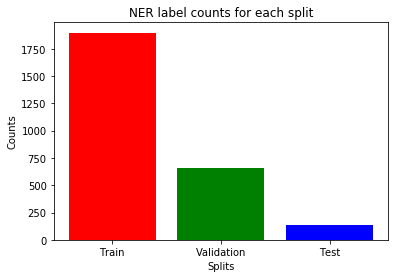

In [18]:
dataset.plot_split_ner_distribution()

### Labels

In [19]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [4]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        device=device,
                                                        id2word=dataset.id2word
                                                        #Add any addtional arguments here
                                                       ))

5079 1753 665
[[2, 0, 100, 2, 6], [100, 2, 517, 2, 20], [517, 100, 581, 12, 19], [581, 517, 582, 8, 19], [582, 581, 583, 3, 15], [583, 582, 520, 5, 5], [520, 583, 75, 10, 14], [75, 520, 397, 4, 19], [397, 75, 526, 7, 14], [526, 397, 18, 4, 5], [18, 526, 531, 3, 5], [531, 18, 403, 8, 19], [403, 531, 29, 4, 5], [29, 403, 127, 4, 20], [127, 29, 0, 4, 25], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], [-1, -1

In [4]:
train_X, val_X, test_X = extract_features(data=dataset.data_df,
                                          max_sample_length=dataset.max_sample_length,
                                          device=device,
                                          id2word=dataset.id2word
                                          #Add any addtional arguments here
                                                       )

5058 1774 665
tensor([[608.,   0.,  10.,  10.,  19.],
        [ 10., 608.,  13.,   1.,   1.],
        [ 13.,  10.,  54.,   3.,   4.],
        [ 54.,  13., 602.,   4.,   8.],
        [602.,  54., 603.,   9.,   3.],
        [603., 602., 604.,  11.,  13.],
        [604., 603., 605.,   9.,   5.],
        [605., 604., 606.,   5.,  14.],
        [606., 605., 607.,   8.,  19.],
        [607., 606.,   0.,  11.,   3.]])


In [21]:
train=train_X
C=torch.Tensor([-1,-1,-1,-1,-1])
for sen in train:
    print(sen)
    for i in range(87-len(sen)):
        torch.cat((sen,C),0)
        

tensor([[ 0.,  0.,  1., 12., 12.],
        [ 1.,  0.,  2., 10., 14.],
        [ 2.,  1.,  3.,  2.,  6.],
        [ 3.,  2.,  4.,  8.,  5.],
        [ 4.,  3.,  5., 15., 14.],
        [ 5.,  4.,  6.,  2., 14.],
        [ 6.,  5.,  7.,  5., 18.],
        [ 7.,  6.,  8.,  5., 19.],
        [ 8.,  7.,  9.,  2., 25.],
        [ 9.,  8., 10., 15., 14.],
        [10.,  9., 11.,  1.,  1.],
        [11., 10., 12., 11.,  3.],
        [12., 11., 13., 11., 14.],
        [13., 12., 14.,  3.,  4.],
        [14., 13., 15.,  9.,  3.],
        [15., 14., 16., 12., 19.],
        [16., 15., 17., 10., 14.],
        [17., 16.,  0., 10., 14.]])


RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 2 and 1 at /pytorch/aten/src/TH/generic/THTensor.cpp:680

## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

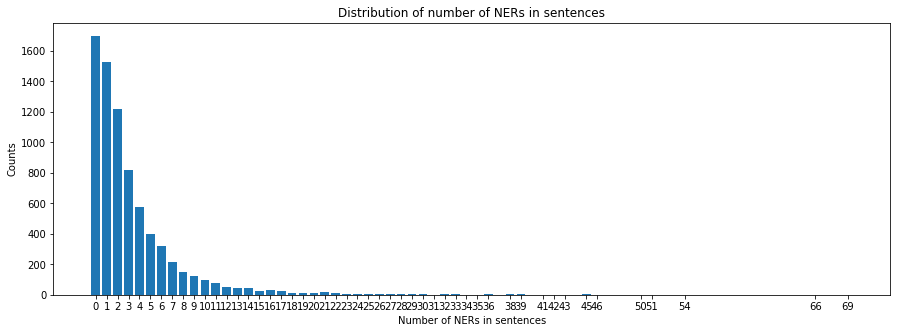

In [5]:
dataset.plot_ner_per_sample_distribution()

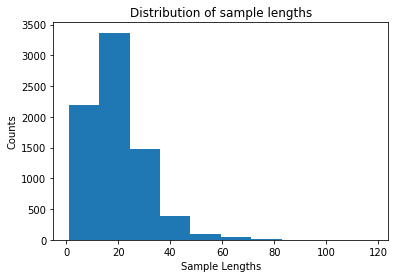

In [6]:
dataset.plot_sample_length_distribution()

In [ ]:
#dataset.plot_ner_cooccurence_venndiagram()

In [8]:
"a" in dataset.id2word.item()

AttributeError: 'dict' object has no attribute 'item'